<a href="https://colab.research.google.com/github/Neerajmn28/CognoRise-Infotech/blob/main/Project3%20Digit%20Recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: Digit Recognition Using ANN and CNN
Objective
The objective of this project is to develop and compare two types of neural network models—an Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN)—for the task of handwritten digit recognition. The models will be trained on a dataset of handwritten digits and will be evaluated based on their accuracy in predicting the correct digit from new, unseen images.

Background
Handwritten digit recognition is a classic problem in the field of computer vision and machine learning. The most commonly used dataset for this task is the MNIST dataset, which contains 60,000 training images and 10,000 testing images of digits from 0 to 9, each represented as a 28x28 pixel grayscale image. This problem serves as a benchmark for various classification algorithms and neural network architectures.



Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from google.colab.patches import cv2_imshow
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Dropout
np.random.seed(0)

Import Data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualize Examples

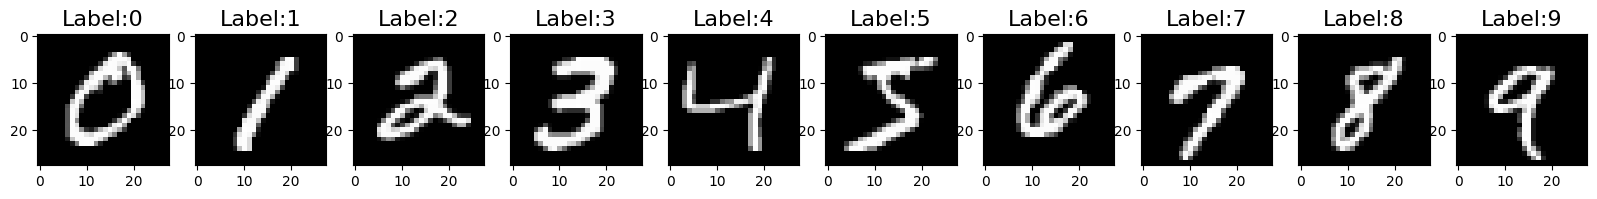

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize = (20,20))
for item in range(0, num_classes):
  sample = x_train[y_train == item][0]
  ax[item].imshow(sample, cmap = 'gray')
  ax[item].set_title('Label:{}'.format(item), fontsize = 16)

In [ ]:
for item in range(10):
  print(y_train[item])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for item in range(10):
  print(y_train[item])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Data Preparation

In [ ]:
# Normalization
x_train = x_train/ 255
x_test = x_test / 255

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


Create Model - Fully Connected Neural Network

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [ ]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 11ms/step - loss: 0.5862 - accuracy: 0.8266
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2273 - accuracy: 0.9334
Epoch 3/10
118/118 [==============================] - 2s 17ms/step - loss: 0.1628 - accuracy: 0.9526
Epoch 4/10
118/118 [==============================] - 2s 16ms/step - loss: 0.1291 - accuracy: 0.9623
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1076 - accuracy: 0.9688
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0887 - accuracy: 0.9732
Epoch 7/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0756 - accuracy: 0.9774
Epoch 8/10
118/118 [==============================] - 2s 17ms/step - loss: 0.0655 - accuracy: 0.9804
Epoch 9/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0590 - accuracy: 0.9825
Epoch 10/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0533 - accura

In [ ]:
prediction = model.predict(x_test)
y_pred = np.argmax(prediction, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

313/313 [==============================] - 1s 2ms/step


# Evaluate the model


In [ ]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 47.7222222222222, 'Predicted labels')

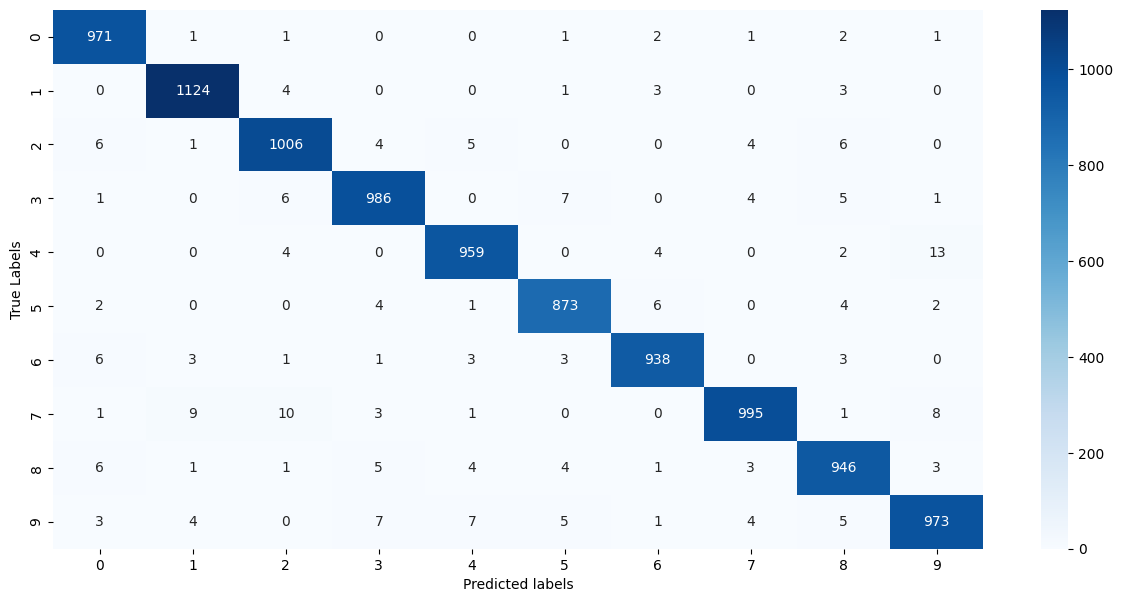

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(confusion_matrix(y_test_new, y_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted labels')

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:{}, Test Accuracy:{}'.format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9771
Test Loss:0.07388201355934143, Test Accuracy:0.9771000146865845


CNN Model

In [ ]:
train_images = x_train.reshape(x_train.shape[0], 28, 28, 1)
test_images = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'softmax'))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [ ]:
cnn_model.fit(train_images, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 52s 54ms/step - loss: 0.1953 - accuracy: 0.9397
Epoch 2/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0545 - accuracy: 0.9835
Epoch 3/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0389 - accuracy: 0.9881
Epoch 4/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0305 - accuracy: 0.9903
Epoch 5/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0237 - accuracy: 0.9927


Evaluating the CNN Model

In [ ]:
cnn_model_predict = cnn_model.predict(test_images)
cnn_model_predict = np.argmax(cnn_model_predict, axis = 1)
cnn_predict_new = np.argmax(y_test, axis = 1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
print(classification_report(cnn_predict_new, cnn_model_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       1.00      0.97      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.97      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(0.5, 47.7222222222222, 'Predicted labels')

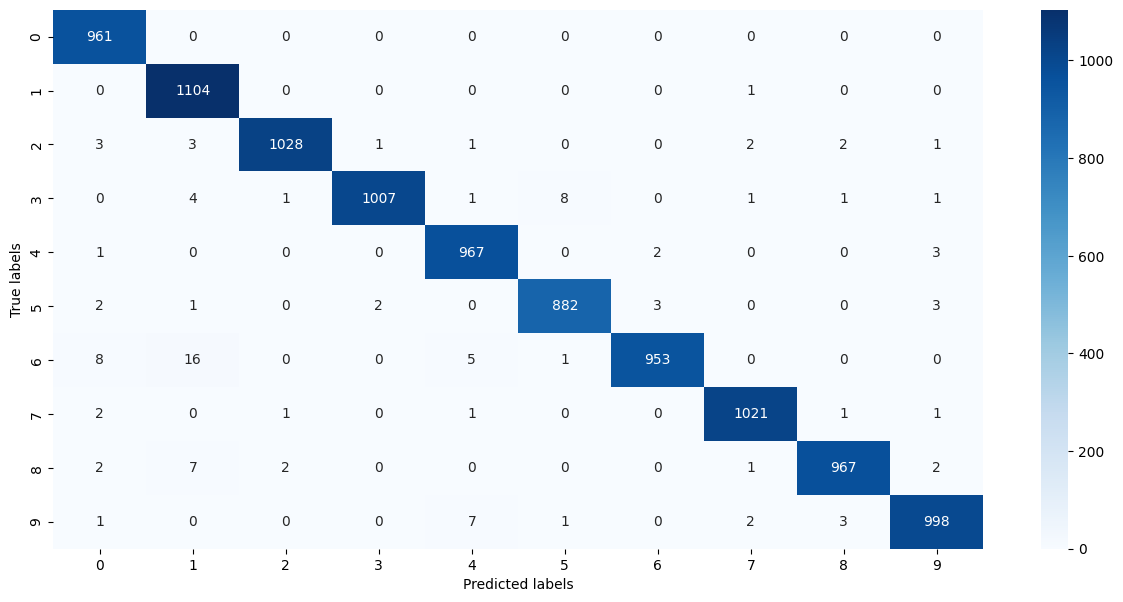

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(confusion_matrix(cnn_model_predict, cnn_predict_new), annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

Predicting a new image

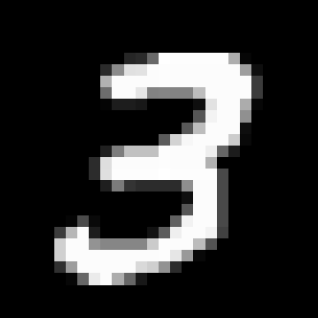

1/1 [==============================] - 0s 174ms/step
The Handwritten Digit is recognised as 3


In [ ]:
input_image = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28,1])

input_prediction  = cnn_model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as', input_pred_label)